# Coursework for Principles of Data Science

Title : An assessment of UK Economy through Payment Transactions


## 1.0 Dataset Source

The analysis is conducted using UK payment systems and GDP data available in the public domain as per below links. The dataset is split into three types - Bank Account Transactions , Credit Card Transaxctions and GDP 

A. Bank Account Payment Transactions Timeseries for UK is available under https://www.wearepay.uk/factsandfigures/ in one file (filename : Historical-Monthly-Payment-Statistics-1990-to-Sep-2020) split into multiple tabs as per below

1. BACS : Monthly Timeseries available from Jan 1990- Sep 2020 includes three different types of transactions (Standing Orders, Direct Debit, Direct Credit) for volume and two features for values (All Credits = Standing Orders plus Direct Credit and Direct Debits)

2. CHAPS : Monthly Timeseries available from Jan  1990- Sep 2020 includes two main features for value and volume of GBP Payments Few records are also available for payments made in Euro currency from Jan 1998 to May 2008. These records were ignored for the analysis as dataset is not consistently available nor is it deemed to have a significant impact for the analysis

3. MonthlyCheque : Monthly Timeseries for Physical Cheques is available from Jan 1990 till Aug 2019 as the cheque processing was migrated to electronic imaging from 2019 onwards. Data is also avilable split between London and Scotland. Physical Cheque processing was migrated to electronic imaging since 2019

4. Credit : Giro payments data available from Jan 1990 till Aug 2019 as processing was migrated to electronic imaging from 2019 onwards

5. Faster Payments : Faster Payments was introduced from 2008 May. Monthly Timeseries is available since this time and it contains four different transaction volume and value related fields. three of the fields were combined to get consolidated volume and value. The Return payments value and volume was ignored for this analysis as the impact was less than 0.5%

6. Image Clearing : Live since 2019 and hence Monthly Timeseries is available since that date. Historic Physical Cheques and Giro transactions are now expected to be settled through this clearing 
    
B. Credit Card Payments : Data available under https://www.ukfinance.org.uk/data-and-research/data/cards/card-spending

1. Monthly Timeseries data is avilable since Jan 1994 till Sep 2020 (and ongoing). File has a number of fields related to transactions value,volume outstanding credit, number of active cards etc
    
C. GDP - two datasets have been used for source of UK GDP data. Both a Quarterly Timeseries

1. https://docs.google.com/spreadsheets/d/1_rJJuTPWB-J8jkRZoeRi3De2tMLBxVcPKN2D-89lkUk/edit#gid=10 (through https://www.theguardian.com/news/datablog/2009/nov/25/gdp-uk-1948-growth-economy#data) with GDP presented as both Nominal and Inflation adjusted and ONS
    
2. https://fred.stlouisfed.org/series/RGDPMPUKQ with inflation adjusted GDP



## 2.0 Data Preparation

A number of steps below are executed to prepare dataset for the Exploratory Data Analysis. This ensures that the datasets are created from source files after ignoring the header and footer rows with commentary/narrative, have a consistent date format across the time series as the source files do not contain the year/month combination for all rows for an automatic upload and manual assignment of column header as the source files have column header across more than one row. Steps below include 

1. upload of the source files into a pandas dataframe , 
2. deleting the header and footer rows on the file as part of the upload process as a number of records have title and descriptions not required for the analysis, 
3. derivation of the datetime for the timeseries 
4. Forward fill used to fill the NaN values in the year column as the source file only has the year mentioned once per year instead of 12 times a year against each month
5. assigning the absolute values to transaction volume (multiplied by 1000) and amount (multiplied by 1,000,000)
    


In [1]:
# Creating Pandas dataframe from Excel Source Files

import os
import pandas as pd

## Bank Account Payment - Excel file with multiple tabs upload for creating individual dataframes of different types of payments namely CHAPS, BACS, Cheques , Giro Payments, Faster Payments and Electonic Imaging Payments tabs
df_CHAPS = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'CHAPS', header=None, skiprows=8, skipfooter=10)
df_BACS = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'BACS', header=None, skiprows=8, skipfooter=8)

df_ChQ = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'MonthlyCheque',header=None, skiprows=8, skipfooter=10)
df_Clr = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'Credit',header=None, skiprows=8, skipfooter=8)
df_DCHQ = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'Image Clearing', header=None, skiprows=8, skipfooter=6)

df_FPS = pd.read_excel('Historical-Monthly-Payment-Statistics-1990-to-Sep-2020_modified.xls', 'Faster Payments', header=None, skiprows=8, skipfooter=4)

## Credit Card Payments - creating dataframe for the credit card payments
df_CreditCard = pd.read_excel('Total Market Credit Card Statistics - September 2020.xlsx', 'credit card data',header=None, skiprows=4, skipfooter=5)

## upload of UK GDP file from the US Federal Bank website
df_GDP_BoE_orig = pd.read_csv('RGDPMPUKQ.csv', parse_dates=['DATE'])

##GDP file from Office of National Statistics
df_GDP = pd.read_csv('UK GDP, since 1955 GDP QUARTERLY mod.csv', parse_dates=['GrossDomesticProductinYear,quarter'])



In [2]:
## assigning datetime to the dataframe

# Adding column header and Cleaning up the uploaded files for Year and Month
import calendar
from datetime import datetime

## file header formatting and datetime conversion for CHAPS
df_CHAPS = df_CHAPS.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"VolumeGBPCHAPS",4:"NA",5:"VolumeEURCHAPS",6:"VolumeEURCHAPSXB",7:"NA",8:"ValueGBPCHAPS",9:"NA",10:"ValueEURCHAPS",11:"ValueEURCHAPSXB"})

df_CHAPS['Year']=pd.to_datetime(df_CHAPS['Year'], format='%Y')
df_CHAPS['Year']=df_CHAPS['Year'].dt.year
df_CHAPS['Year']=df_CHAPS['Year'].fillna(method='ffill')
df_CHAPS['Day']="01"
df_CHAPS['Month']=pd.to_datetime(df_CHAPS['Month'],format='%B')
df_CHAPS['Month']=df_CHAPS['Month'].dt.month
df_CHAPS['TimePeriod'] = pd.to_datetime(dict(year=df_CHAPS['Year'],month=df_CHAPS['Month'], day=df_CHAPS['Day']),format='%Y%m%d')

## file header formatting and datetime conversion for BACS
df_BACS = df_BACS.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"VolumeBACSSO",4:"VolumeBACSDC",5:"VolumeBACSDD",6:"NA",7:"ValueBACSSODC",8:"ValueBACSDD"})
df_BACS['Year']=pd.to_datetime(df_BACS['Year'], format='%Y')
df_BACS['Year']=df_BACS['Year'].dt.year
df_BACS['Year']=df_BACS['Year'].fillna(method='ffill')
df_BACS['Day']="01"
df_BACS['Month']=pd.to_datetime(df_BACS['Month'],format='%B')
df_BACS['Month']=df_BACS['Month'].dt.month
#df_BACS['TimePeriod'] = df_BACS.index
df_BACS['TimePeriod'] = pd.to_datetime(dict(year=df_BACS['Year'],month=df_BACS['Month'], day=df_BACS['Day']),format='%Y%m%d')

## file header formatting and datetime conversion for FPS
df_FPS = df_FPS.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"NA", 4:"VolumeFPSSOP",5:"VolumeFPSSIP",6:"VolumeFPSFDP",7:"VolumeFPSReturns",8:"NA", 9:"ValueFPSSOP",10:"ValueFPSSIP",11:"ValueFPSFDP",12:"ValueFPSReturns"})
df_FPS['Year']=pd.to_datetime(df_FPS['Year'], format='%Y')
df_FPS['Year']=df_FPS['Year'].dt.year
df_FPS['Year']=df_FPS['Year'].fillna(method='ffill')
df_FPS['Day']="01"
df_FPS['Month']=pd.to_datetime(df_FPS['Month'],format='%B')
df_FPS['Month']=df_FPS['Month'].dt.month
df_FPS['TimePeriod'] = pd.to_datetime(dict(year=df_FPS['Year'],month=df_FPS['Month'], day=df_FPS['Day']),format='%Y%m%d')

## file header formatting and datetime conversion for Physical Cheque file  
df_ChQ = df_ChQ.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"VolChqLon", 4:"NA",5:"VolChqSct",6:"NA",7:"LdnInBr",8:"NA",9:"SctInBr",10:"",11:"ValChqLon",12:"NA", 13:"ValChqSct"})
df_ChQ['Year']=pd.to_datetime(df_ChQ['Year'], format='%Y')
df_ChQ['Year']=df_ChQ['Year'].dt.year
df_ChQ['Year']=df_ChQ['Year'].fillna(method='ffill')
df_ChQ['Day']="01"
df_ChQ['Month']=pd.to_datetime(df_ChQ['Month'],format='%B')
df_ChQ['Month']=df_ChQ['Month'].dt.month
df_ChQ['TimePeriod'] = pd.to_datetime(dict(year=df_ChQ['Year'],month=df_ChQ['Month'], day=df_ChQ['Day']),format='%Y%m%d')


## file header formatting and datetime conversion for Giro Payments
df_Clr = df_Clr.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"VolCreLon", 4:"NA",5:"VolCreSco",6:"NA",7:"VolLdnInBr",8:"NA",9:"VolScoInBr",10:"NA",11:"ValCreLon",12:"NA", 13:"ValCreSct"})
df_Clr['Year']=pd.to_datetime(df_Clr['Year'], format='%Y')
df_Clr['Year']=df_Clr['Year'].dt.year
df_Clr['Year']=df_Clr['Year'].fillna(method='ffill')
df_Clr['Day']="01"
df_Clr['Month']=pd.to_datetime(df_Clr['Month'],format='%B')
df_Clr['Month']=df_Clr['Month'].dt.month
#df_Clr['TimePeriod'] = df_Clr.index
df_Clr['TimePeriod'] = pd.to_datetime(dict(year=df_Clr['Year'],month=df_Clr['Month'], day=df_Clr['Day']),format='%Y%m%d')

## file header formatting and datetime conversion for Digital Cheque file 
df_DCHQ = df_DCHQ.rename(columns={0:"TimePeriod",1: "Year",2:"Month",3:"NA", 4:"ChqRTPVol",5:"ChqITPVol",6:"ChqRTPVal",7:"ChqITPVal"})
df_DCHQ['Year']=pd.to_datetime(df_DCHQ['Year'], format='%Y')
df_DCHQ['Year']=df_DCHQ['Year'].dt.year
df_DCHQ['Year']=df_DCHQ['Year'].fillna(method='ffill')
df_DCHQ['Day']="01"
df_DCHQ['Month']=pd.to_datetime(df_DCHQ['Month'],format='%B')
df_DCHQ['Month']=df_DCHQ['Month'].dt.month
#df_DCHQ['TimePeriod'] = df_DCHQ.index
df_DCHQ['TimePeriod'] = pd.to_datetime(dict(year=df_DCHQ['Year'],month=df_DCHQ['Month'], day=df_DCHQ['Day']),format='%Y%m%d')

## file header formatting and assigning the datetime stamp to Credit Card transactions

df_CreditCard = df_CreditCard.rename(columns={0:"TimePeriod",1: "date",2:"Credit Balance",3:"NA", 4:"Net Changes MoM",5:"NA",6:"Annualised Growth net write-offs",7:"NA",8:"Gross Lending Monthly",9:"purchases Monthly/Gross Lending",10:"of which cash withdrawals/Gross Lending",11:"Balance Transfers",12:"NA", 13:"Volume of cards transactions",14:"of purchases /total txns", 15:"of cash withdrawal/total txns", 16:"bal tfr/total txns",17:"NA",18:"Credit Card avg value of txn",19:"Credit Card avg value of cash txn",20:"avg bal of balance tfr",21:"", 22:"no. of Credit cards in use", 23:"no. of accounts", 24:"no. of active accounts Credit Cards", 25:"% of active accounts for Credit Cards", 26:"NA", 27:"% balance bearing interest", 28:"NA", 29:"purchases seasonally adjusted"})
df_CreditCard['TimePeriod']=df_CreditCard['date']

## file header and date assignment for the two GDP dataframes

df_GDP['TimePeriod1'] = df_GDP['GrossDomesticProductinYear,quarter'].dt.to_period("Q").dt.end_time
df_GDP['TimePeriod']=df_GDP['TimePeriod1'].dt.strftime('%Y-%m-%d')
df_GDP = df_GDP.rename(columns={'GrossDomesticProductinYear,quarter':"GDP:Period",
                                'GrossDomesticProduct:QuarteronQuarterGrowth.': "GDP:QoQGrowth",
                                'Chainedvolumemeasures:Seasonallyadjusted.£m':"GDP:InfAdj£",
                                'GDP,notadjustedforinflation£m':"GDP:Value£",
                                'PerpersonNon-inflation':"GDP:PerPerNonAdj",
                                'Perperson,inflationadjusted':"GDP:PerPerInfAdj"})

df_GDP_BoE_orig['Qdate'] = [date - pd.tseries.offsets.DateOffset(days=1) + pd.tseries.offsets.QuarterEnd() for date in  df_GDP_BoE_orig.DATE]



In [3]:
## conversion of volume and value of transactions into absolute numbers 

### converting the CHAPS Payments column values to absolute e.g. notation 000s for volume and £m in the source file
df_CHAPS.loc[:, 'VolumeGBPCHAPS'] *=1000
df_CHAPS.loc[:,'ValueGBPCHAPS']*=1000000

df_CHAPS.loc[:,'VolumeEURCHAPS']*=1000
df_CHAPS.loc[:,'ValueEURCHAPS']*=1000000

df_CHAPS.loc[:,'VolumeEURCHAPSXB']*=1000
df_CHAPS.loc[:,'ValueEURCHAPSXB']*=1000000

df_CHAPS.loc[:,'AvgValVolCHAPS']=df_CHAPS.ValueGBPCHAPS/df_CHAPS.VolumeGBPCHAPS

### converting the BACS Payments column values to absolute e.g. notation 000s for volume and £m in the source file
df_BACS.loc[:,'VolumeBACSSO']*=1000          
df_BACS.loc[:,'VolumeBACSDC']*=1000        
df_BACS.loc[:,'VolumeBACSDD']*=1000            
              
df_BACS.loc[:,'ValueBACSSODC']*=1000000          
df_BACS.loc[:,'ValueBACSDD']*=1000000

### converting the FPS Payments column values to absolute e.g. notation 000s for volume and £m in the source file
df_FPS.loc[:,'VolumeFPSSOP']*=1000         
df_FPS.loc[:,'VolumeFPSSIP']*=1000           
df_FPS.loc[:,'VolumeFPSFDP']*=1000           
df_FPS.loc[:,'VolumeFPSReturns']*=1000

df_FPS.loc[:,'ValueFPSSOP']*=1000000           
df_FPS.loc[:,'ValueFPSSIP']*=1000000
df_FPS.loc[:,'ValueFPSFDP']*=1000000
df_FPS.loc[:,'ValueFPSReturns']*=1000000

###conversion of values to absolute number in £mn
df_CreditCard.loc[:,'Credit Balance']*=1000000          
df_CreditCard.loc[:,'Net Changes MoM']*=1000000
df_CreditCard.loc[:,'Gross Lending Monthly']*=1000000
df_CreditCard.loc[:,'purchases Monthly/Gross Lending']*=1000000
df_CreditCard.loc[:,'of which cash withdrawals/Gross Lending']*=1000000
df_CreditCard.loc[:,'Balance Transfers']*=1000000

###Conversion of volume to absolute number in 000s
df_CreditCard.loc[:,'Volume of cards transactions']*=1000
df_CreditCard.loc[:,'of purchases /total txns']*=1000
df_CreditCard.loc[:,'of cash withdrawal/total txns']*=1000
df_CreditCard.loc[:,'bal tfr/total txns']*=1000

df_CreditCard.loc[:,'no. of Credit cards in use']*=1000
df_CreditCard.loc[:,'no. of accounts']*=1000
df_CreditCard.loc[:,'no. of active accounts Credit Cards']*=1000
df_CreditCard.loc[:,'purchases seasonally adjusted']*=1000

### conversion of the amount and volume for Physical , Giro and Digital Cheques

df_ChQ.loc[:,'VolChqLon']*=1000           
df_ChQ.loc[:,'VolChqSct']*=1000            
df_ChQ.loc[:,'LdnInBr']*=1000              
df_ChQ.loc[:,'SctInBr']*=1000
df_ChQ.loc[:,'ValChqLon']*=1000000          
df_ChQ.loc[:,'ValChqSct']*=1000000

df_DCHQ.loc[:,'ChqRTPVol']*=1000          
df_DCHQ.loc[:,'ChqITPVol']*=1000           
df_DCHQ.loc[:,'ChqRTPVal']*=1000000          
df_DCHQ.loc[:,'ChqITPVal']*=1000000


df_Clr.loc[:,'VolCreLon']*=1000
df_Clr.loc[:,'VolCreSco']*=1000
df_Clr.loc[:,'VolLdnInBr']*=1000
df_Clr.loc[:,'VolScoInBr']*=1000
df_Clr.loc[:,'ValCreLon']*=1000000 
df_Clr.loc[:,'ValCreSct']*=1000000


###conversion of GDP data into £million absolute value

df_GDP.loc[:,'GDP:InfAdj£']*=1000000
df_GDP.loc[:,'GDP:Value£']*=1000000




## 

## 3.1 Data Derivation Part I - Payment Transactions

Progressive outer joins used on all types of Payments dataframes for creating one unified payment dataframe combining all types of Bank Account Payments (CHAPS, BACS, FPS, Cheques). The resulting dataset was inner joined with Credit Card Payments to create an unified Payments dataset. Inner join was used as Credit Card data is not available prior to 1994 unlike the Bank Account Payments data. The unified dataframe was then condensed with reduced number of featuresto facilitate the exploratory data analysis for evaluating the modelling steps.

As Faster Payments was mainly introduced to faciliate same day transactions with the longer term view for replacing BACS. The dataframes for BACS and FPS have been combined to the volume and value as overall Low Value Payments. New fields were created for Transaction Value and Transaction Volume combining three types of BACS and three types of Faster Payments transactions. Also, Faster Payments has only been available since 2008 so the values prior to this date was taken as zero for combining the data frameworks

Similarly, the Physical Cheques, Giro and Digital Cheques dataframes were merged to create one dateframe with total value and volume of Cheque transactions. As the Physical Cheques and Giro data is only available till 2019 and Digital Cheque since 2019, an empty set of records were created with zero values for the period of 2019-2020 before merging the dataframe with Digital Cheques data

The dataframes were then incrementally combined (e.g. BACS with FPS, BACS+FPS with CHAPS, BACS+FPS+CHAPS with Cheques and Credit Card) to create a unified dataframe for all types of Payments with new aggregated Volume and Value fields to reduce the number of features across individual dataframes.


In [4]:
## Merging dataframes to reduce the number of databases

### Merging the dataframes for BACS and Faster Payment System to create one Low Value Payments dataframe and dropping the columns not required
df_BACS_FPS=pd.merge(left=df_BACS, right=df_FPS, how='left', left_on='TimePeriod', right_on='TimePeriod')
df_BACS_FPS.drop(['Year_x','Month_x','Day_x', 'Year_y','Month_y','Day_y','NA_x','NA_y'],axis=1, inplace=True)
df_BACS_FPS= df_BACS_FPS.fillna(0)
df_BACS_FPS['VolumeofallBACS']=df_BACS_FPS[['VolumeBACSSO', 'VolumeBACSDC','VolumeBACSDD']].sum(axis=1)
df_BACS_FPS['ValueofallBACS']=df_BACS_FPS[['ValueBACSSODC', 'ValueBACSDD']].sum(axis=1)
df_BACS_FPS['VolumeofallFPS']=df_BACS_FPS[['VolumeFPSSOP', 'VolumeFPSSIP','VolumeFPSFDP']].sum(axis=1)
df_BACS_FPS['ValueofallFPS']=df_BACS_FPS[['ValueFPSSOP', 'ValueFPSSIP','ValueFPSFDP']].sum(axis=1)
df_BACS_FPS['VolBACSFPS']=df_BACS_FPS[['VolumeofallBACS', 'VolumeofallFPS']].sum(axis=1)
df_BACS_FPS['ValBACSFPS']=df_BACS_FPS[['ValueofallBACS', 'ValueofallFPS']].sum(axis=1)
df_BACS_FPS.to_excel("Test_BACS_FPS.xlsx") 
        
### Merging the BACS_FPS combined dataframe with CHAPS
df_CHAPS_BACS_FPS = pd.merge(left=df_CHAPS, right=df_BACS_FPS, how='left', left_on='TimePeriod', right_on='TimePeriod')
df_CHAPS_BACS_FPS.drop(['Year','Month','Day','VolumeEURCHAPS','VolumeEURCHAPSXB','ValueEURCHAPS', 'ValueEURCHAPSXB'],axis=1, inplace=True)

### Merging three dataframes of Physical Cheques, Giro and Digital Cheque to create one. Step includes creating empty rows in the Physical Cheques dataframe to combine the Digital Cheque through outer join
df_ChQ.drop(['Year','Month','Day','NA'],axis=1, inplace=True)
listOfSeries = [pd.Series(['2019-09-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2019-10-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2019-11-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2019-12-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-01-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-02-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-03-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-04-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-05-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-06-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-07-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-08-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) ,
                pd.Series(['2020-09-01 00:00:00', 0, 0, 0,0,0,0,0], index=df_ChQ.columns ) 
               ]


#### Pass a list of series to the append() to add multiple rows
df_ChQ = df_ChQ.append(listOfSeries , ignore_index=True)
df_ChQ['TimePeriod'] = pd.to_datetime(df_ChQ['TimePeriod'])
df_ChQ_DCHQ = pd.merge(left=df_ChQ, right=df_DCHQ, how='left', left_on='TimePeriod', right_on='TimePeriod')
df_ChQ_Clr = pd.merge(left=df_ChQ_DCHQ, right=df_Clr, how='left', left_on='TimePeriod', right_on='TimePeriod')
df_ChQ_Clr.drop(['Year_x','Month_x','NA_x','Day_x','Year_y','Month_y','NA_y','Day_y'],axis=1, inplace=True)
df_ChQ_Clr['TotalVolChqCre'] = df_ChQ_Clr[['VolChqLon','VolChqSct','LdnInBr','SctInBr','ChqRTPVol','ChqITPVol','VolCreLon','VolCreSco','VolLdnInBr','VolScoInBr']].sum(axis=1)
df_ChQ_Clr['TotalValChqCre'] = df_ChQ_Clr[['ValChqLon','ValChqSct','ChqRTPVal','ChqITPVal','ValCreLon','ValCreSct']].sum(axis=1)

### combining BACS, FPS, CHAPS and Cheques dataframes
#df_electronic_manual = pd.merge(left=df_CHAPS_BACS_FPS, right=df_ChQ_Clr, how='left', left_on='TimePeriod', right_on='TimePeriod')

df_payments_all_interim= pd.merge(left=df_CHAPS_BACS_FPS, right=df_ChQ_Clr, how='left', left_on='TimePeriod', right_on='TimePeriod')

### combining BACS, FPS, CHAPS and Cheques dataframes and Credit Card Payments using outer join 
df_payments_all = pd.merge(left=df_payments_all_interim, right=df_CreditCard, how='left', left_on='TimePeriod', right_on='TimePeriod')

#### Inner join to ensure data consistency across the timeperiod as the Credit Card Payments data is not available prior to 1994
df_payments_all_1994 = pd.merge(left=df_payments_all_interim, right=df_CreditCard, how='right', left_on='TimePeriod', right_on='TimePeriod')

df_payments_all.drop(['NA_x','NA_y','_x','_y','date'],axis=1, inplace=True)
df_payments_all_1994.drop(['NA_x','NA_y','_x','_y','date'],axis=1, inplace=True)


df_payments_condensed = df_payments_all_1994[['TimePeriod','VolumeGBPCHAPS','ValueGBPCHAPS','Gross Lending Monthly','Volume of cards transactions','TotalVolChqCre','TotalValChqCre','VolBACSFPS','ValBACSFPS']]

#print (df_payments_condensed.head(5))

#df=df_payments_condensed.rename({'VolumeGBPCHAPS':'Volume High Val Monthl}, axis=1)


df_payments_condensed = df_payments_condensed.rename(columns={'VolumeGBPCHAPS':'Volume High Val Monthly',
                                                                  'ValueGBPCHAPS':'Value High Val Monthly',
                                                                  'Gross Lending Monthly': 'Value Monthly Credit Card Spend', 
                                                                  'Volume of cards transactions': 'Volume Monthly Credit Card Spend',
                                                                  'TotalVolChqCre':'Volume Cheques Monthly',
                                                                  'TotalValChqCre':'Value Cheques Monthly',
                                                                  'VolBACSFPS':'Volume Low Val Monthly',
                                                                  'ValBACSFPS':'Value Low Val Monthly'}
                                                    )

df_payments_condensed_copy = df_payments_condensed.copy()



## 4.1 Exploratory Data Analysis - Payments Data

A scatter plot is used as a visual analytics method for both Transaction Volumne and Transaction Value to assess the data quality as well as to understand the relationship between the continuous variables. Initially the scatter plot showed anamolies and on investigation, issues were identified with the source data quality. BACS source file had a number formatting mask for only a certain range of values, Cheques data was available across different columns over different periods. Both these issues were corrected and the source files were re uploaded. The new Scatterplots exhibited a positive correlation between High Value Payments , Low Value Payments and Credit Card Payments and a negative corelation with Cheques Payments. This validates the declining usage of cheques in UK over a period of time as more payments are made electronically and using cards.

A summary statistical description of the Payment Transactions volume and value dataframe is not very useful to understand the characteristics of the timeseries data as mean and variance for a Timeseries should be analysed over a period of time to identify Stationary vs Non Stationary timeseries.

Timeseries plot and boxplots are used to visually analyse the timeseries for the Transaction Volume and Value across High Value, Low Value, Cheques and Credit Card Payments. Visually these plots indicate a Non Stationary timeseries i.e a the mean and variance change over period of time.



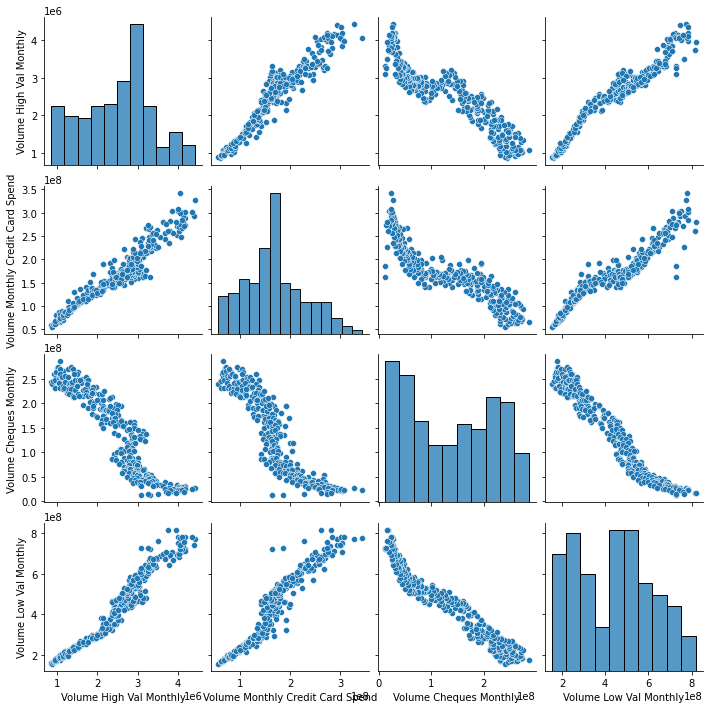

In [10]:
### Visual Analysis for checking the data quality and relationships for Transaction Volume

import seaborn as sns


df_payments_cod_vol = df_payments_condensed[['TimePeriod','Volume High Val Monthly','Volume Monthly Credit Card Spend','Volume Cheques Monthly','Volume Low Val Monthly']].copy().set_index(('TimePeriod'))

sns.pairplot(df_payments_cod_vol)

df_payments_cod_vol_copy = df_payments_cod_vol.copy()


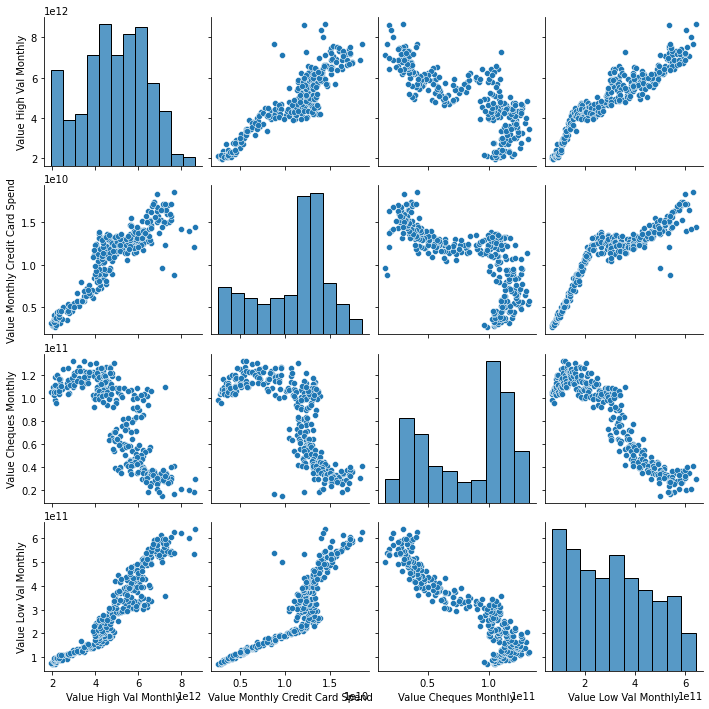

In [27]:
### Visual data analysis for Transaction Values

df_payments_cod_val=df_payments_condensed[['TimePeriod','Value High Val Monthly','Value Monthly Credit Card Spend','Value Cheques Monthly','Value Low Val Monthly']].copy().set_index(('TimePeriod'))

df_payments_cod_val_copy = df_payments_cod_val.copy()

sns.pairplot(df_payments_cod_val)

In [26]:
### Descriptive Statistical Analysis

df_payments_condensed.describe()


,Volume High Val Monthly,Value High Val Monthly,Value Monthly Credit Card Spend,Volume Monthly Credit Card Spend,Volume Cheques Monthly,Value Cheques Monthly,Volume Low Val Monthly,Value Low Val Monthly,year,month
count,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,321.000000,321.000000
mean,2.505626e+06,4.921057e+12,1.093661e+10,1.685858e+08,1.356351e+08,8.140601e+10,4.424535e+08,3.075738e+11,2006.878505,6.457944
std,8.567268e+05,1.500706e+12,3.860261e+09,6.002214e+07,8.222842e+07,3.502019e+10,1.752917e+08,1.566354e+11,7.734715,3.444961
min,8.660000e+05,1.953703e+12,2.581374e+09,5.553233e+07,1.147111e+07,1.481467e+10,1.526510e+08,7.004333e+10,1994.000000,1.000000
25%,1.862000e+06,4.036566e+12,8.282352e+09,1.305179e+08,5.568333e+07,4.431517e+10,2.796888e+08,1.645124e+11,2000.000000,3.000000
50%,2.648000e+06,4.956959e+12,1.225015e+10,1.649556e+08,1.340650e+08,9.948900e+10,4.597628e+08,3.019213e+11,2007.000000,6.000000
75%,3.018379e+06,5.970535e+12,1.333467e+10,2.025639e+08,2.136220e+08,1.101510e+11,5.687625e+08,4.286210e+11,2014.000000,9.000000
max,4.420839e+06,8.658312e+12,1.857551e+10,3.432284e+08,2.855750e+08,1.329200e+11,8.179024e+08,6.403879e+11,2020.000000,12.000000


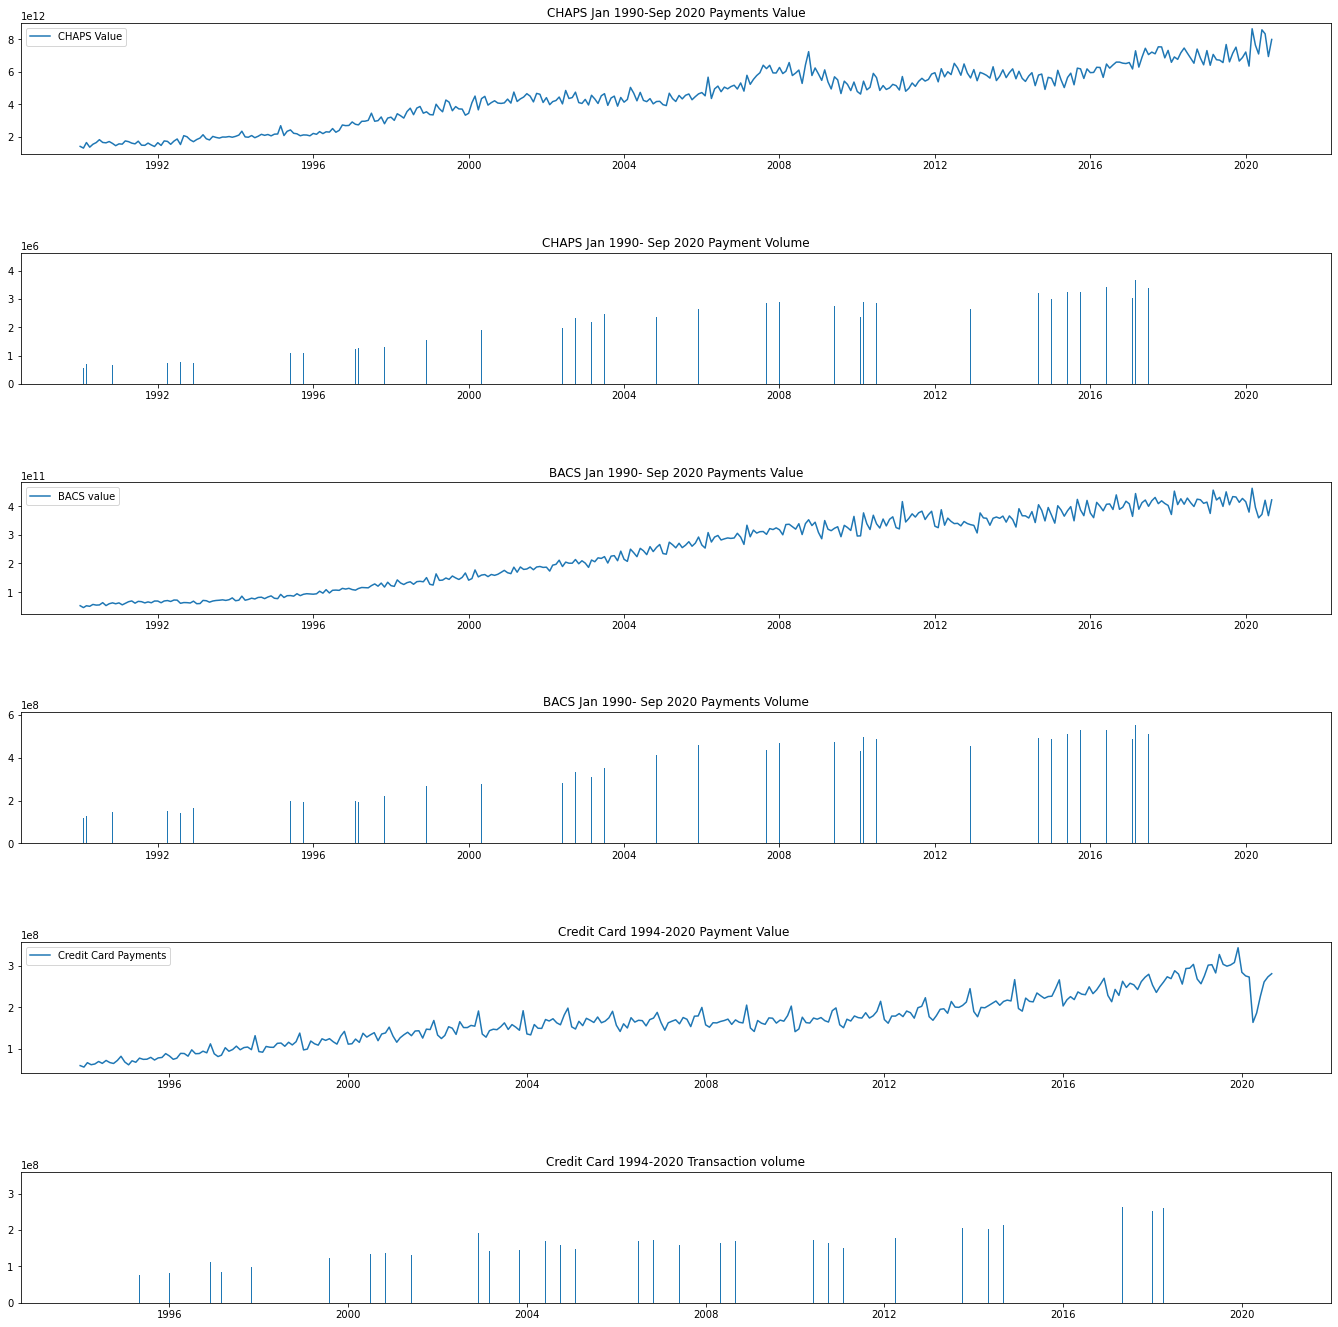

In [28]:
### Timeseries plot of Payments Datasets

import matplotlib.pyplot as plt
import seaborn as sns

#sns.scatterplot(df_CHAPS['VolumeofGBPPayments'],df_CHAPS['ValueofGBPPayments'])

# The top plot consisting of High Value Payment amount
top = plt.subplot2grid((8, 8), (0,0), colspan=4)
top.plot(df_CHAPS_BACS_FPS['TimePeriod'], df_CHAPS_BACS_FPS['ValueGBPCHAPS'], label='CHAPS Value')
plt.title('CHAPS Jan 1990-Sep 2020 Payments Value')
plt.legend(loc=2)

# The bottom plot consisting of High Value Payment Volume 
bottom = plt.subplot2grid((8, 8), (1,0), colspan=4)
bottom.bar(df_CHAPS_BACS_FPS['TimePeriod'], df_CHAPS_BACS_FPS['VolumeGBPCHAPS'])
plt.title('CHAPS Jan 1990- Sep 2020 Payment Volume')

#plt.gcf().set_size_inches(12, 8)
#plt.subplots_adjust(hspace=0.75)

# The top plot consisting of BACS Value Payment amount
top1 = plt.subplot2grid((8,8), (2,0), colspan=4)
top1.plot(df_CHAPS_BACS_FPS['TimePeriod'],df_CHAPS_BACS_FPS['ValueofallBACS'],label='BACS value')
plt.title('BACS Jan 1990- Sep 2020 Payments Value')
plt.legend(loc=2)

# The bottom plot consisting of BACS Payment volumne
bottom1 = plt.subplot2grid((8,8), (3,0), colspan=4)
bottom1.bar(df_CHAPS_BACS_FPS['TimePeriod'], df_CHAPS_BACS_FPS['VolumeofallBACS'])
plt.title('BACS Jan 1990- Sep 2020 Payments Volume')


# The top plot consisting of Faster Payment value
top1 = plt.subplot2grid((8,8), (4,0), colspan=4)
top1.plot(df_CHAPS_BACS_FPS['TimePeriod'],df_CHAPS_BACS_FPS['ValueofallFPS'],label='FPS value')
plt.title('Faster Payments May 2008-Sep 2020 Value')
plt.legend(loc=2)

# The bottom plot consisting of Faster Payment volume
bottom1 = plt.subplot2grid((8,8), (5,0), colspan=4)
bottom1.bar(df_CHAPS_BACS_FPS['TimePeriod'], df_CHAPS_BACS_FPS['VolumeofallFPS'])
plt.title('Faster Payments May 2008-Sep 2020 Volume')

plt.gcf().set_size_inches(48, 32)
plt.subplots_adjust(hspace=0.75)

# The top plot consisting of Credit Card value
top1 = plt.subplot2grid((8,8), (4,0), colspan=4)
top1.plot(df_CreditCard['TimePeriod'],df_CreditCard['Volume of cards transactions'],label='Credit Card Payments')
plt.title('Credit Card 1994-2020 Payment Value ')
plt.legend(loc=2)

# The bottom plot consisting of Credit cards Payment volume
bottom1 = plt.subplot2grid((8,8), (5,0), colspan=4)
bottom1.bar(df_CreditCard['TimePeriod'], df_CreditCard['Volume of cards transactions'])
plt.title('Credit Card 1994-2020 Transaction volume')

plt.gcf().set_size_inches(48, 32)
plt.subplots_adjust(hspace=0.75)

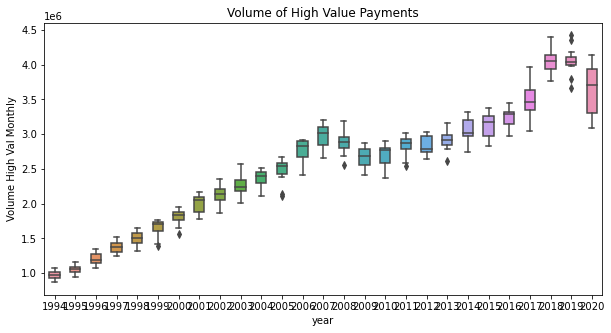

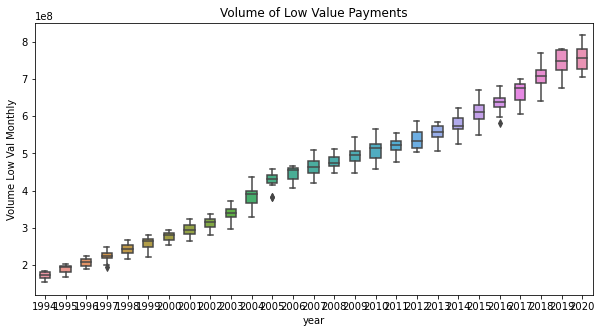

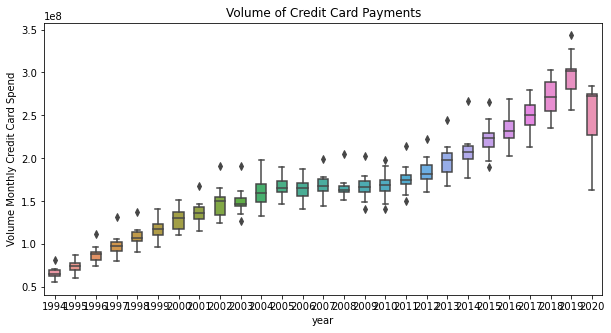

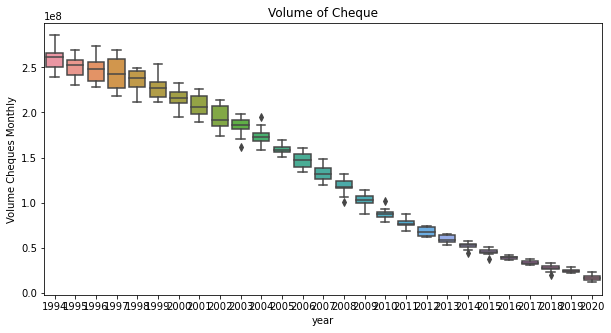

In [17]:
### Descriptive Statistical Analysis of Payments Transaction Volume through a Boxplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#print (df_payments_condensed)
#fig, ax = plt.subplots(figsize=(12,5))
#seaborn.boxplot(df_payments_condensed.index.monthofyear, df_payments_condensed, ax=ax)

df_payments_condensed['year'] = df_payments_condensed['TimePeriod'].dt.year

df_payments_condensed['month'] = df_payments_condensed['TimePeriod'].dt.month

#print (df_payments_condensed.columns)


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Volume High Val Monthly", data=df_payments_condensed, width=0.5)
plt.title('Volume of High Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Volume Low Val Monthly", data=df_payments_condensed, width=0.5)
plt.title('Volume of Low Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Volume Monthly Credit Card Spend", data=df_payments_condensed, width=0.5)
plt.title('Volume of Credit Card Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Volume Cheques Monthly", data=df_payments_condensed, width=0.8)
plt.title('Volume of Cheque')
plt.show()

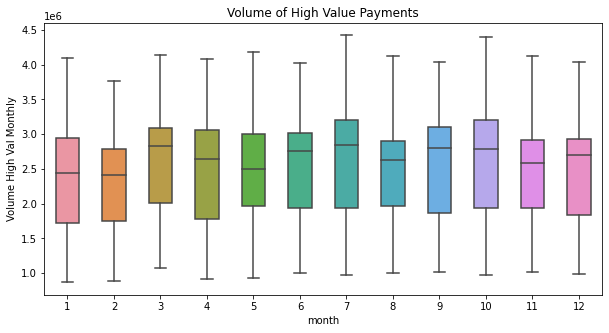

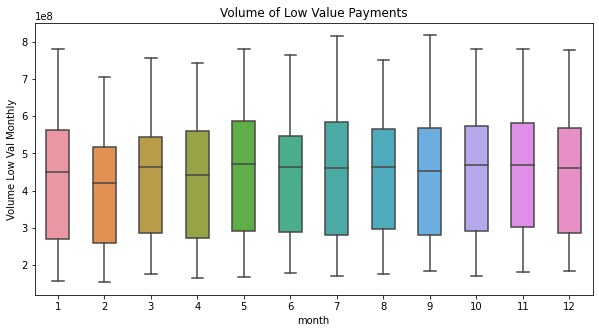

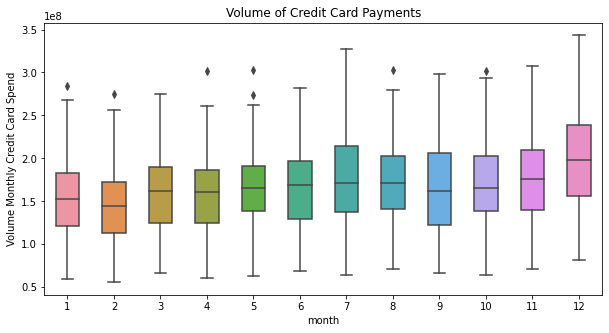

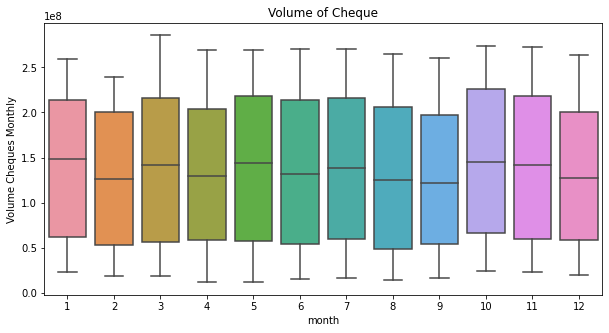

In [15]:
### Visual Analysis for checking the data quality and relationships for Transaction Value

plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Volume High Val Monthly", data=df_payments_condensed, width=0.5)
plt.title('Volume of High Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Volume Low Val Monthly", data=df_payments_condensed, width=0.5)
plt.title('Volume of Low Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Volume Monthly Credit Card Spend", data=df_payments_condensed, width=0.5)
plt.title('Volume of Credit Card Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Volume Cheques Monthly", data=df_payments_condensed, width=0.5)
plt.title('Volume of Cheque')
plt.show()

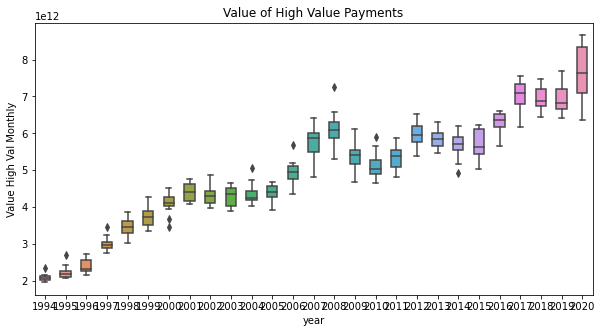

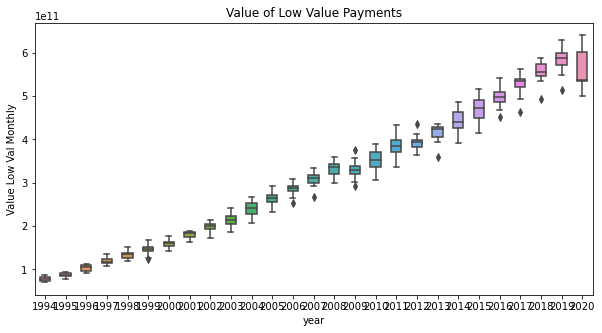

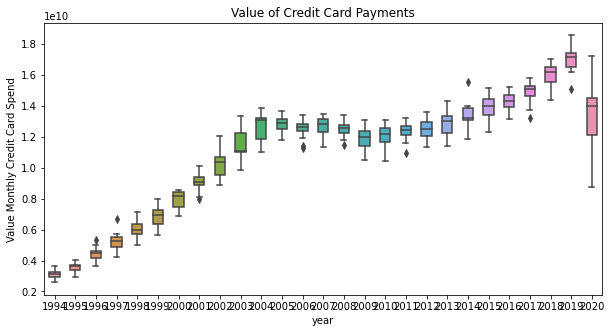

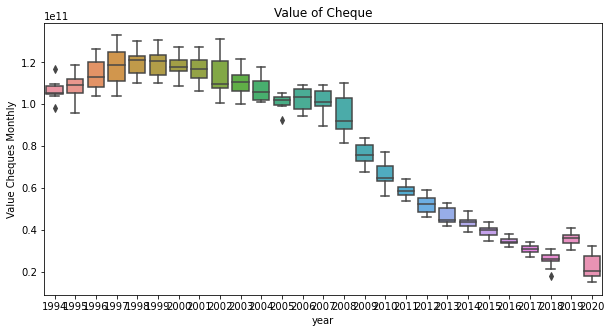

In [21]:
### Yearly Boxplot of Payment Values to analyse the trends 

df_payments_cod_val['year']=df_payments_cod_val.index.year
df_payments_cod_val['month']=df_payments_cod_val.index.month

plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Value High Val Monthly", data=df_payments_cod_val, width=0.5)
plt.title('Value of High Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Value Low Val Monthly", data=df_payments_cod_val, width=0.5)
plt.title('Value of Low Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Value Monthly Credit Card Spend", data=df_payments_cod_val, width=0.5)
plt.title('Value of Credit Card Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="year", y="Value Cheques Monthly", data=df_payments_cod_val, width=0.8)
plt.title('Value of Cheque')
plt.show()



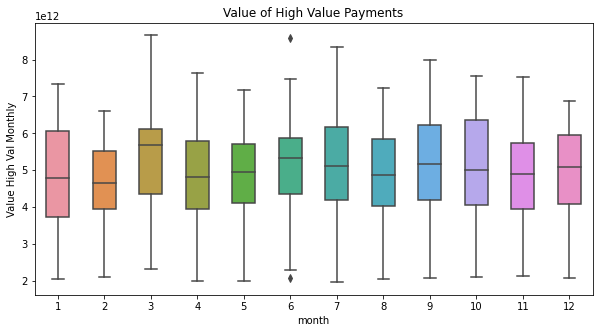

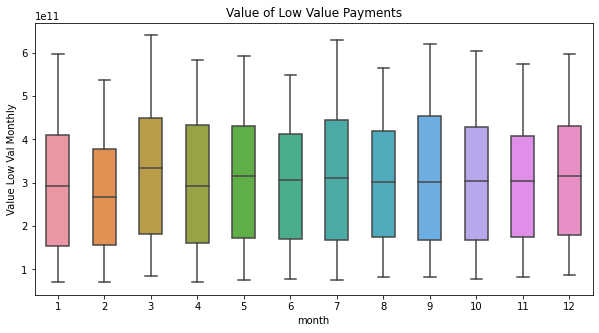

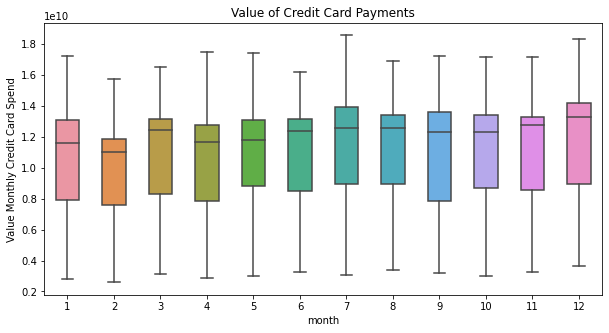

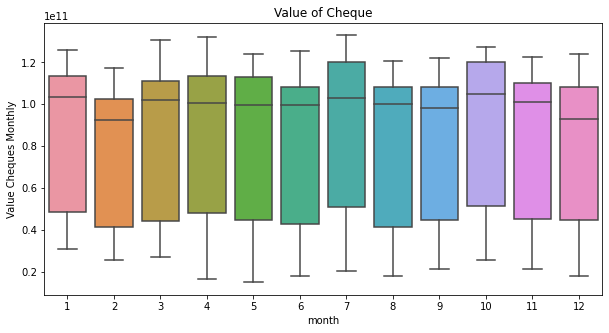

In [20]:
## monthly boxplots for Payments Transactions Value

plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Value High Val Monthly", data=df_payments_cod_val, width=0.5)
plt.title('Value of High Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Value Low Val Monthly", data=df_payments_cod_val, width=0.5)
plt.title('Value of Low Value Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Value Monthly Credit Card Spend", data=df_payments_cod_val, width=0.5)
plt.title('Value of Credit Card Payments')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="Value Cheques Monthly", data=df_payments_cod_val, width=0.8)
plt.title('Value of Cheque')
plt.show()

## 3.2 Data Derivation Part I - Payment Transactions

(array([-5.0e+10,  0.0e+00,  5.0e+10,  1.0e+11,  1.5e+11,  2.0e+11,
         2.5e+11,  3.0e+11,  3.5e+11,  4.0e+11,  4.5e+11]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

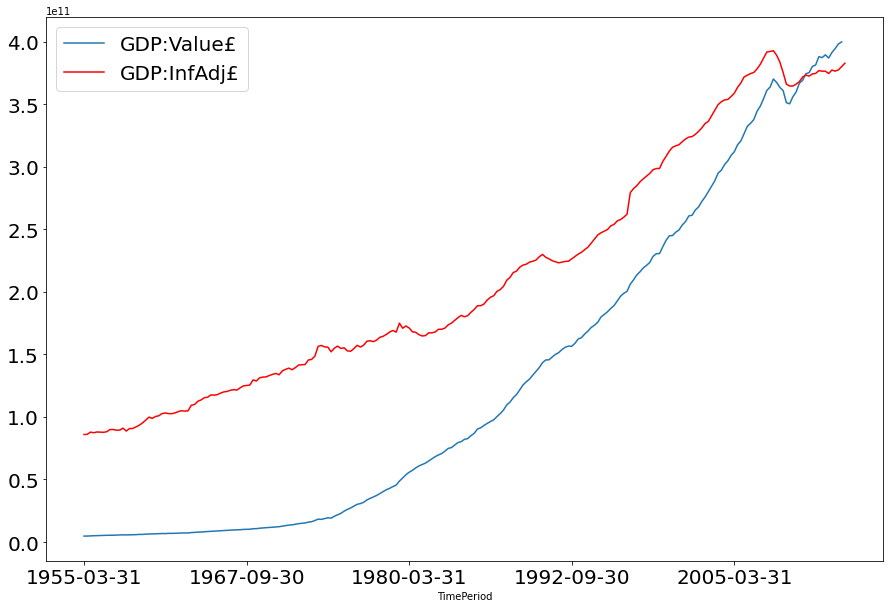

In [9]:
###Exploratory Data Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
ax = plt.gca()

df_GDP.plot(x='TimePeriod',y='GDP:Value£', ax=ax)
df_GDP.plot(x='TimePeriod',y='GDP:InfAdj£', color ='red',ax=ax)

plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## 4.2  Exploratory Data Analysis - GDP Data